### Шаг 1.Загрузка необходимых библиотек и изучение общей информации. 

In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Загрузка датасета и изучение информации
filepath = r'C:\Users\Torberg\Documents\Yandex Projects\Project2\real_estate_data.csv'
estate_data = pd.read_csv(filepath, sep= '\t')
display(estate_data.sample(5))
print('******************************************************************************')
estate_data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16370,8,2100000.0,35.0,2017-08-04T00:00:00,1,NaN,12.0,15.4,12,NaN,...,11.0,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,27.0
19005,6,7300000.0,65.0,2015-08-21T00:00:00,2,NaN,23.0,34.1,11,False,...,18.1,0.0,Санкт-Петербург,18695.0,16268.0,1.0,51.0,1.0,344.0,721.0
20549,5,4100000.0,40.2,2017-08-07T00:00:00,1,2.78,10.0,17.7,10,NaN,...,13.0,1.0,Санкт-Петербург,34824.0,15923.0,0.0,NaN,2.0,724.0,112.0
15190,9,15642981.0,93.0,2017-11-29T00:00:00,2,NaN,16.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,31244.0,6572.0,1.0,677.0,1.0,474.0,NaN
12473,1,2750000.0,46.7,2017-12-06T00:00:00,1,NaN,23.0,18.0,8,NaN,...,11.5,1.0,посёлок Парголово,61517.0,21565.0,0.0,NaN,0.0,NaN,30.0


******************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  floa

### Вывод

В начале получаем таблицу из 23699 строк и 22 столбцов. Методом .info() получаем общую информацию об исходных данных.

### Шаг 2. Предобработка данных

In [3]:
# Перевод формата данных из float64 в datetime64
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [4]:
# Обработка пропусков
display(estate_data['locality_name'].isna().sum())
estate_data.dropna(subset= ['locality_name'], inplace= True)
estate_data.info()

49

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [5]:
# Обработка пропусков (продолжение)
estate_data['last_price'] = estate_data['last_price'].astype('int')
estate_data['days_exposition'] = estate_data['days_exposition'].fillna(0).astype('int')
estate_data['balcony'] = estate_data['balcony'].fillna(0).astype('int')
display(estate_data.sample(5))
print('******************************************************************************')
print(estate_data['days_exposition'].isna().sum())
print(estate_data['balcony'].isna().sum())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19675,17,4100000,76.4,2019-02-25,3,2.60,5.0,42.9,5,NaN,...,8.1,0,деревня Горбунки,NaN,NaN,NaN,NaN,NaN,NaN,0
7188,7,2280000,64.5,2018-02-23,4,NaN,5.0,48.0,2,NaN,...,7.0,1,Новая Ладога,NaN,NaN,NaN,NaN,NaN,NaN,99
20021,11,5000000,40.1,2018-11-14,1,2.65,10.0,20.1,6,NaN,...,10.8,1,Санкт-Петербург,26495.0,14198.0,0.0,NaN,0.0,NaN,0
22669,5,6800000,85.6,2018-06-30,3,NaN,19.0,56.5,2,NaN,...,10.7,0,Санкт-Петербург,37717.0,14561.0,0.0,NaN,0.0,NaN,68
13608,9,4320000,55.9,2017-10-13,3,2.52,5.0,41.1,1,NaN,...,6.0,0,Санкт-Петербург,41419.0,11602.0,3.0,558.0,0.0,NaN,192


******************************************************************************
0
0


In [6]:
# Смена типа данных с object на bool
estate_data['is_apartment'] = estate_data['is_apartment'].astype('bool')
print(estate_data['is_apartment'].value_counts())
estate_data.info()

True     20940
False     2710
Name: is_apartment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_are

In [7]:
# Заполнение пропусков
ceiling_height_median = estate_data.groupby('locality_name')['ceiling_height'].median().fillna(0).to_dict()

def filler_func(row):
    if pd.isna(row['ceiling_height']):
        return ceiling_height_median.get(row['locality_name'])
    return row['ceiling_height']

estate_data['ceiling_height'] = estate_data.apply(filler_func, axis=1)

kitchen_area_median = estate_data.groupby('locality_name')['kitchen_area'].median().fillna(0).to_dict()
#print(estate_data['kitchen_area'].describe())
def filler_func1(row):
    if pd.isna(row['kitchen_area']):
        return kitchen_area_median.get(row['locality_name'])
    return row['kitchen_area']

estate_data['kitchen_area'] = estate_data.apply(filler_func1, axis=1)

living_area_median = estate_data.groupby('living_area')['ceiling_height'].median().fillna(0).to_dict()
#print(estate_data['living_area'].describe())
def filler_func2(row):
    if pd.isna(row['living_area']):
        return ceiling_height_median.get(row['locality_name'])
    return row['living_area']

estate_data['living_area'] = estate_data.apply(filler_func2, axis=1)

living_area_median = estate_data.groupby('living_area')['ceiling_height'].median().fillna(0).to_dict()

def filler_func3(row):
    if pd.isna(row['cityCenters_nearest']):
        return ceiling_height_median.get(row['locality_name'])
    return row['cityCenters_nearest']

estate_data['cityCenters_nearest'] = estate_data.apply(filler_func3, axis=1)
display(estate_data.sample(5))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14897,9,2575000,35.61,2017-06-08,1,2.70,17.0,12.79,11,True,...,13.63,0,посёлок Мурино,NaN,2.7,NaN,NaN,NaN,NaN,24
12496,14,14000000,110.00,2017-02-24,3,3.00,12.0,50.00,9,True,...,22.00,1,Санкт-Петербург,40855.0,12558.0,2.0,167.0,0.0,NaN,270
3691,10,5200000,40.00,2018-06-16,1,3.16,8.0,2.70,4,True,...,9.90,0,Санкт-Петербург,10492.0,10879.0,0.0,NaN,1.0,767.0,111
18161,11,4250000,60.00,2018-01-15,3,2.50,9.0,2.50,4,False,...,7.00,3,Сосновый Бор,NaN,2.5,NaN,NaN,NaN,NaN,240
18502,15,4900000,49.00,2019-03-11,2,2.50,5.0,32.00,1,True,...,6.00,0,Санкт-Петербург,42413.0,14916.0,0.0,NaN,0.0,NaN,42


Первичная проверка на дубликаты дает значение 0. По общей информации определяем в каких столбцах обнаружены пропуски - celing_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 
В столбце 'days_exposition' сначала был выполнен поиск где значения равны 0 - получен пустой DataFrame, поэтому места пропусков заполнены нулями, так как вероятно объявление провисело на сайте менее 1 дня, то есть оно было снято в день публикации. Для столбца с количеством балконов сделано предположение, что пропуски говорят об отсутствии балконов, поэтому они заполнены нулями. Также были удалены строки с пропущенными значениями в столбце 'locality_name' - их всего 49, эти пропуски не исказят общую картину. Адекватно заполнить пропуски в оставшихся столбцах не представляется возможным - эти данные нужно знать точно.
Тип данных в столбцах 'last_price', 'days_exposition', 'balcony' изменен на целочисленный. Тип данных в столбце 'first_day_exposition' изменен на datetime. И в столбце 'is_apartment' тип данных изменен на boolean.

### Шаг 3. Посчитайте и добавьте в таблицу

In [8]:
# Подсчет цены за кв.м.
estate_data['price_per_m2'] = estate_data['last_price']/estate_data['total_area'] #столбец с ценой за кв.метр жилья

In [9]:
# Добавление столбцов с днем недели, месяцем и годом публикации объявления
estate_data['weekday'] = estate_data['first_day_exposition'].dt.weekday    
estate_data['month'] = estate_data['first_day_exposition'].dt.month
estate_data['year'] = estate_data['first_day_exposition'].dt.year
display(estate_data.sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year
12009,8,19770000,95.8,2018-02-01,2,2.70,9.0,53.00,3,True,...,4800.00,1.0,648.0,1.0,779.0,145,206367.432150,3,2,2018
10633,9,2900000,45.0,2017-02-15,2,3.10,3.0,2.55,1,True,...,2.55,NaN,NaN,NaN,NaN,413,64444.444444,2,2,2017
17432,10,4800000,58.0,2018-03-10,2,2.65,15.0,2.64,2,True,...,24359.00,0.0,NaN,0.0,NaN,60,82758.620690,5,3,2018
138,8,4800000,40.0,2017-11-18,2,2.70,3.0,29.00,2,True,...,2913.00,0.0,NaN,2.0,729.0,80,120000.000000,5,11,2017
17936,5,7550000,89.0,2017-04-23,4,3.25,6.0,61.00,3,True,...,3369.00,2.0,516.0,0.0,NaN,271,84831.460674,6,4,2017


In [10]:
# Добавление столбца с делением на первый/последний/другие этажи
def floor_func(row):            
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    return 'other'
estate_data['first/last_floor'] = estate_data.apply(floor_func, axis=1) 
display(estate_data.sample(5)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,first/last_floor
13280,11,5300000,58.0,2016-03-29,3,2.7,5.0,38.30,3,False,...,0.0,NaN,0.0,NaN,170,91379.310345,1,3,2016,other
1245,10,3100000,31.3,2018-02-01,1,2.5,5.0,17.80,1,True,...,0.0,NaN,1.0,478.0,42,99041.533546,3,2,2018,first
17509,9,3990000,41.6,2016-06-22,1,2.7,12.0,21.60,5,False,...,0.0,NaN,0.0,NaN,27,95913.461538,2,6,2016,other
9854,10,7700000,72.0,2017-07-21,2,2.7,16.0,38.00,6,True,...,0.0,NaN,1.0,330.0,133,106944.444444,4,7,2017,other
22013,1,13479200,81.2,2017-01-11,3,3.1,16.0,43.83,11,True,...,1.0,441.0,2.0,427.0,814,166000.000000,2,1,2017,other


In [11]:
# Добавление соотношения жилой и общей площади, площади кухни и общей площади
estate_data['living/total_area'] = estate_data['living_area']/estate_data['total_area']
estate_data['kitchen/total_area'] = estate_data['kitchen_area']/estate_data['total_area']
display(estate_data.sample(5)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,first/last_floor,living/total_area,kitchen/total_area
2685,12,21615000,100.0,2018-04-03,2,2.7,10.0,57.0,9,True,...,2.0,359.0,90,216150.000000,1,4,2018,other,0.570000,0.360000
21196,12,2876100,55.9,2018-03-25,2,2.6,15.0,25.0,10,True,...,NaN,NaN,16,51450.805009,6,3,2018,other,0.447227,0.232558
10293,1,3687397,38.8,2018-07-23,1,2.7,4.0,2.7,1,True,...,1.0,562.0,71,95036.005155,0,7,2018,first,0.069588,0.190722
6395,11,4700000,44.0,2018-10-23,2,2.6,10.0,28.0,10,True,...,1.0,568.0,137,106818.181818,1,10,2018,last,0.636364,0.147727
16755,12,7000000,80.0,2018-02-03,3,2.6,14.0,2.7,12,True,...,2.0,383.0,64,87500.000000,5,2,2018,other,0.033750,0.123750


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

##### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [12]:
# Добавим столбец с ценой в млн. у.е.
estate_data['last_price_fractional'] = estate_data['last_price']/1000000  

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64



count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_fractional, dtype: float64



count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64



count    23650.000000
mean         2.719961
std          1.029026
min          0.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64





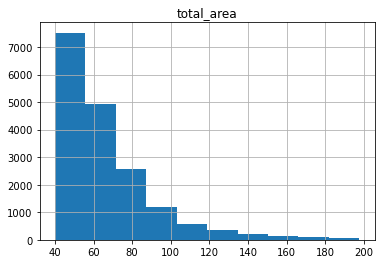

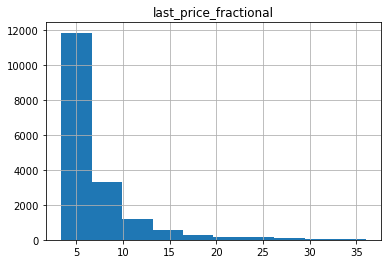

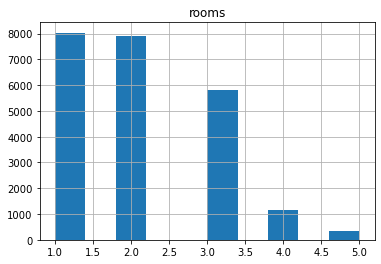

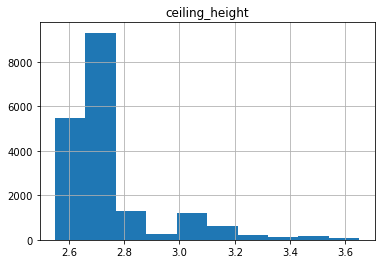

In [13]:
# Изучим данные методом .describe()
# и построим гистограммы
def hist_func(column):
    print(estate_data[column].describe())
    print(2*'\n')
    estate_data.hist(column, range = (estate_data[column].quantile(q = 0.25), estate_data[column].quantile(q = 0.99)))


for column in estate_data[['total_area', 'last_price_fractional', 'rooms', 'ceiling_height']]:
    hist_func(column)
    
     



Изучены данные для общей площади недвижимости и построена гистограмма. Получены выбросы в виде 12 кв.м. квартиры и 900 кв.м. - это наверняка выбросы, которые не стоит рассматривать. Наиболее часто встречающиеся значения - от 40 до 70 кв.м.
Изучены данные для цены на недвижимость. В таблицу добавлен столбец 'last_price_fractional' в котором указана цена в млн. у.е. Получены выбросы в виде 12 тыс. у.е. и 763 млн. у.е. - это наверняка выбросы, которые не стоит рассматривать. Наиболее часто встречающиеся значения - от 3.4 до 7 млн. у.е.
Изучены данные для количества комнат. Получены выбросы в виде 0 и 19 комнат - это наверняка выбросы, которые не стоит рассматривать. Наиболее часто встречающиеся значения - от 1 до 3 комнат.
Изучены данные для высоты потолков. Получены выбросы в виде 1 и 100 метров - это наверняка выбросы, которые не стоит рассматривать. Наиболее часто встречающиеся значения - от 2,52 до 2,80 метров.

##### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [14]:
# Изучаем необходимые данные
estate_data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

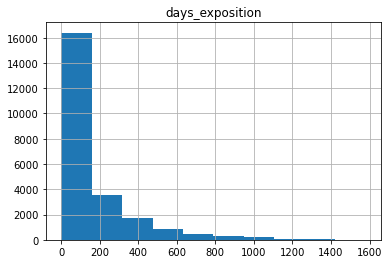

In [15]:
# Строим гистограмму
estate_data.hist('days_exposition')

Изучены данные для количества дней прошедших от момента публикации и до продажи недвижимости. Среднее значение - 156 дней, медианное - 73 дней. Разброс от минимального значения до максимального - 1580 (более 4 лет). Построена гистограмма.

<AxesSubplot:title={'center':'Ящик с усами для обнаружения \nвыбросов и экстремальных значений'}, ylabel='Количество дней, прошедших \nс даты публикации объявления'>

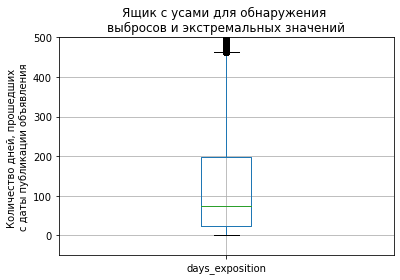

In [16]:
# Построим "ящик с усами" для поиска редких и выбивающихся значений
plt.ylim(-50, 500)
plt.title("Ящик с усами для обнаружения \nвыбросов и экстремальных значений")
plt.ylabel("Количество дней, прошедших \nс даты публикации объявления")
estate_data.boxplot('days_exposition')

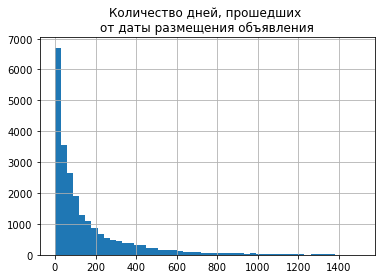

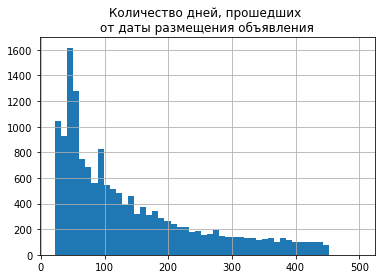

In [17]:
# Построим гистограмму всех данных и отфильтрованных
estate_data.hist('days_exposition', bins=50, range= (0, 1500))
plt.title("Количество дней, прошедших \nот даты размещения объявления")
plt.show()
good_data = estate_data.query('days_exposition >22 & days_exposition <=450')
good_data.hist('days_exposition', bins=50, range= (22, 500))
plt.title("Количество дней, прошедших \nот даты размещения объявления")
plt.show()

In [18]:
# Посмотрим на описание отфильтрованных данных
good_data['days_exposition'].describe()

count    15610.000000
mean       139.196156
std        108.266654
min         23.000000
25%         54.000000
50%        101.000000
75%        195.000000
max        450.000000
Name: days_exposition, dtype: float64

Для обработки редких и выбивающихся значений построен "ящик с усами". Все что больше 450 дней считаем выбросами. Левый хвост "ящика" упирается в 0, а значение 1 квартиля равно 22. Все что меньше 22 дней считаем необычно быстрой продажей квартиры, все что более 450 дней считаем необычно долгой. Перестроив гистограммы видим, что наиболее частое время продажт - от 40 до 50 дней. Так же встречаются "всплески" в районе 60 и 90 дней. Данные между 22 и 450 днями считаем "хорошими" и дальше работаем только с ними.

##### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Коэффициент корреляции равен 0.6292779719939116


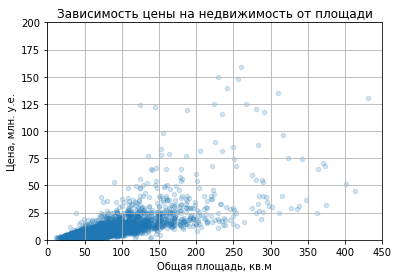

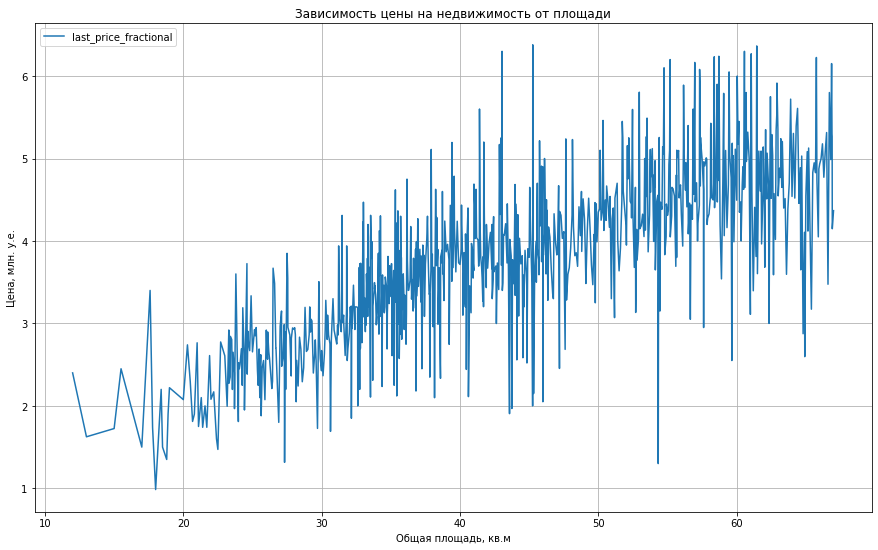

In [19]:
# Строим графики для поиска зависимостей
# График зависимости цены от общей площади
good_data.plot(x= 'total_area', y= 'last_price_fractional', kind= 'scatter', grid = True, ylim= (0, 200), xlim= (0,450), alpha= 0.2)
plt.title("Зависимость цены на недвижимость от площади")
plt.xlabel("Общая площадь, кв.м")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('total_area <= total_area.quantile(q = 0.75) and last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'total_area', values= 'last_price_fractional')
    .plot(grid = True, figsize = (15, 9), title = 'Зависимость цены на недвижимость от площади')
);
plt.xlabel("Общая площадь, кв.м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['total_area'].corr(good_data['last_price_fractional'])))

Изучена зависмость цены на недвижимость от общей площади недвижимости. Построен график зависимости методом группировки с pivot_table для большей наглядности. Посчитан коэффициент корреляции. K = 0.63. Он положителен, значит чем больше площадь продаваемого жилья, тем выше его стоимость.

Коэффициент корреляции равен 0.3339920380274595


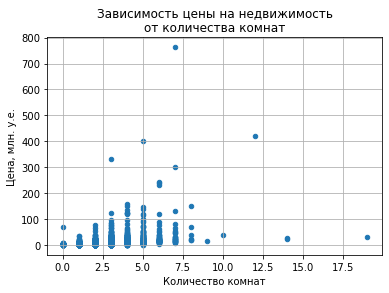

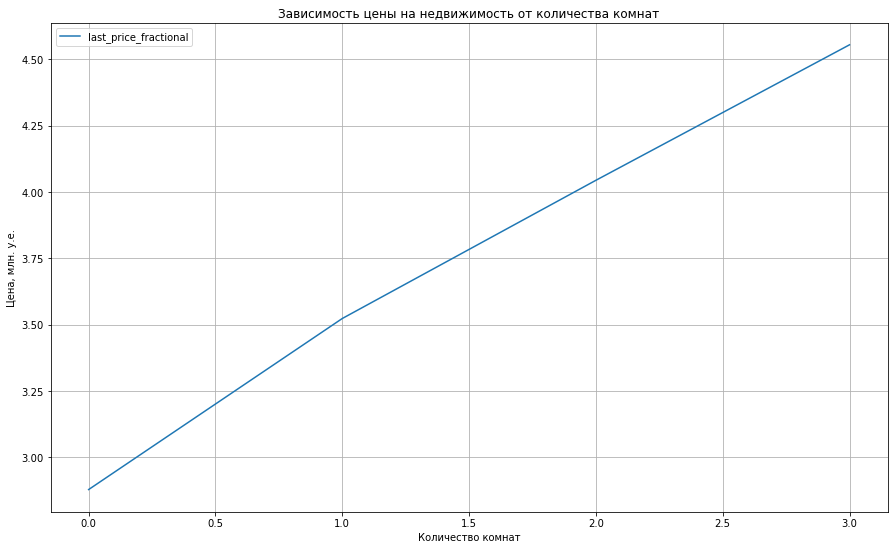

In [20]:
# График зависимости цены от количества комнат
good_data.plot(x= 'rooms', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость\nот количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('rooms <= rooms.quantile(q = 0.75) and last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'rooms', values= 'last_price_fractional')
    .plot(grid = True, figsize = (15, 9))
);
plt.title("Зависимость цены на недвижимость от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['rooms'].corr(good_data['last_price_fractional'])))

Изучена зависмость цены на недвижимость от количества комнат. Построен график зависимости методом группировки с pivot_table для большей наглядности. Получена информативная кривая, по виду которой можно сказать, что с увеличением числа комнат, растет цена квартиры. Посчитанный коффициент корреляции не дает объективной информации из-за большого выброса в виде цены в 800 млн. у.е. и квартир, в которых более 8 комнат.

Коэффиент корреляции равен -0.03807919119315892


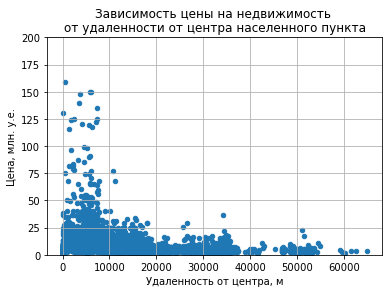

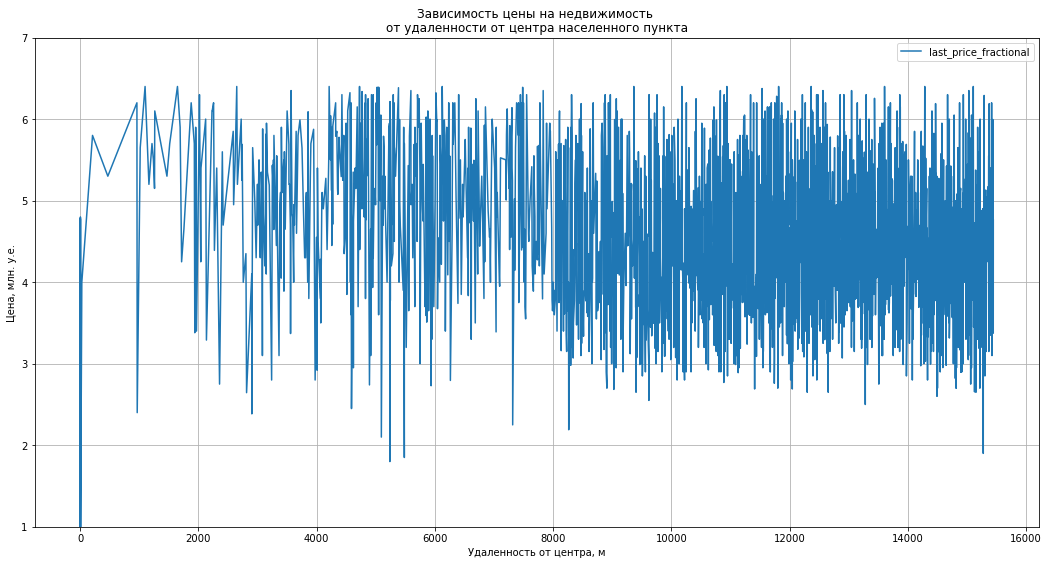

In [21]:
# График зависимости цены от удаленности от центра
good_data.plot(x= 'cityCenters_nearest', y= 'last_price_fractional', kind= 'scatter', grid = True, ylim = (0, 200))
plt.title("Зависимость цены на недвижимость \nот удаленности от центра населенного пункта")
plt.xlabel("Удаленность от центра, м")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('cityCenters_nearest <= cityCenters_nearest.quantile(q = 0.75) and last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'cityCenters_nearest', values= 'last_price_fractional')
    .plot(ylim = (1,7), grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот удаленности от центра населенного пункта")
plt.xlabel("Удаленность от центра, м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффиент корреляции равен {}".format(good_data['cityCenters_nearest'].corr(good_data['last_price_fractional'])))

Изучена зависмость цены на недвижимость от удалености от центра . Построен график зависимости методом группировки с pivot_table для большей наглядности. Можно сделать вывод, что чем ближе к центру города находится квартира, тем она дороже продается. Это подтверждает отрицвтельный коэффициент корреляции - чем меньше расстояние до центра, тем выше стоимость.

,last_price_fractional
first/last_floor,
first,3.80
last,4.20
other,4.65


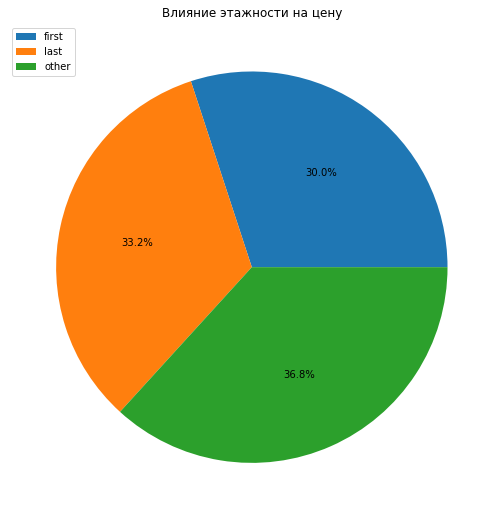

In [22]:
# График зависимости цены от "этажности" квартиры
floor_data_pie = good_data.pivot_table(index = 'first/last_floor', values = 'last_price_fractional', aggfunc = 'median')
display(floor_data_pie)
floor_data_pie.columns = ['median_price']
labels = 'Первый этаж', 'Последний этаж', 'Другие этажи'
floor_data_pie.plot(y= 'median_price', kind = 'pie', labels=None, autopct='%1.1f%%', figsize = (9,9))
plt.title('Влияние этажности на цену') 
plt.ylabel('')
plt.show()

Изучена зависмость цены на недвижимость от "этажности" квартиры. Построена круговая диаграмма для ответа на вопрос задания. По полученным данным можно сказать, что квартиры на первом этаже здания стоят дешевле (возможно, это связано с риском ограбления и на первом этаже очень шумно). Чуть подороже стоят квартиры на последнем этаже (остается риск проникновения воров, зато отсутствуют соседи сверху и вид из окна существенно улучшается:). Остальные квартиры стоят дороже (снижаются риски ограбления)

Коэффицциент корреляции равен 0.004546193069782533


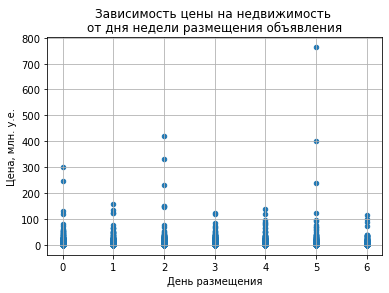

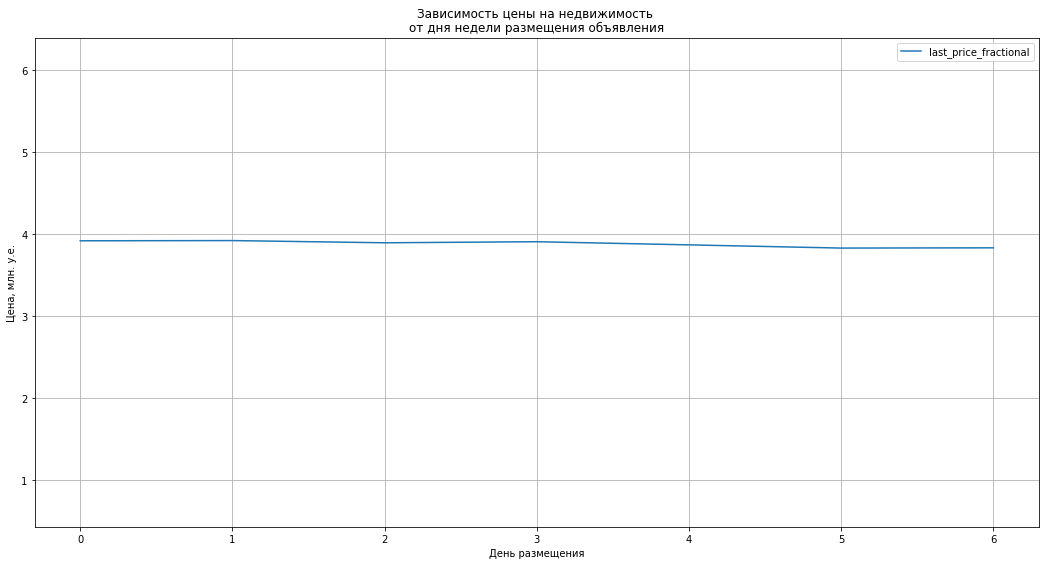

In [23]:
# График зависимости цены от дня недели размещения объявления
good_data.plot(x= 'weekday', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот дня недели размещения объявления")
plt.xlabel("День размещения")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'weekday', values= 'last_price_fractional')
    .plot(ylim = (good_data['last_price_fractional'].min(),good_data['last_price_fractional'].quantile(q = 0.75)),grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот дня недели размещения объявления")
plt.xlabel("День размещения")
plt.ylabel("Цена, млн. у.е.")
print("Коэффицциент корреляции равен {}".format(good_data['weekday'].corr(good_data['last_price_fractional'])))

В этом пункте группировка с pivot_table не дает какого-либо конкретного ответа на поставленный вопрос. Зато значение коэффициента корреляции (практически равно 0) говорит само за себя - какой либо зависмости цены на недвижимость от дня недели размещения объявления о продаже не существует.  

Коэффициент корреляции равен 0.0036777265125169057


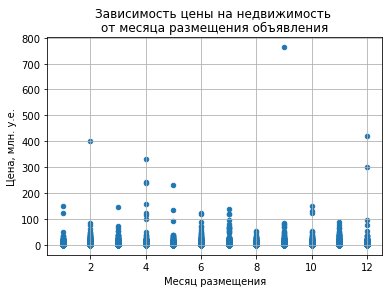

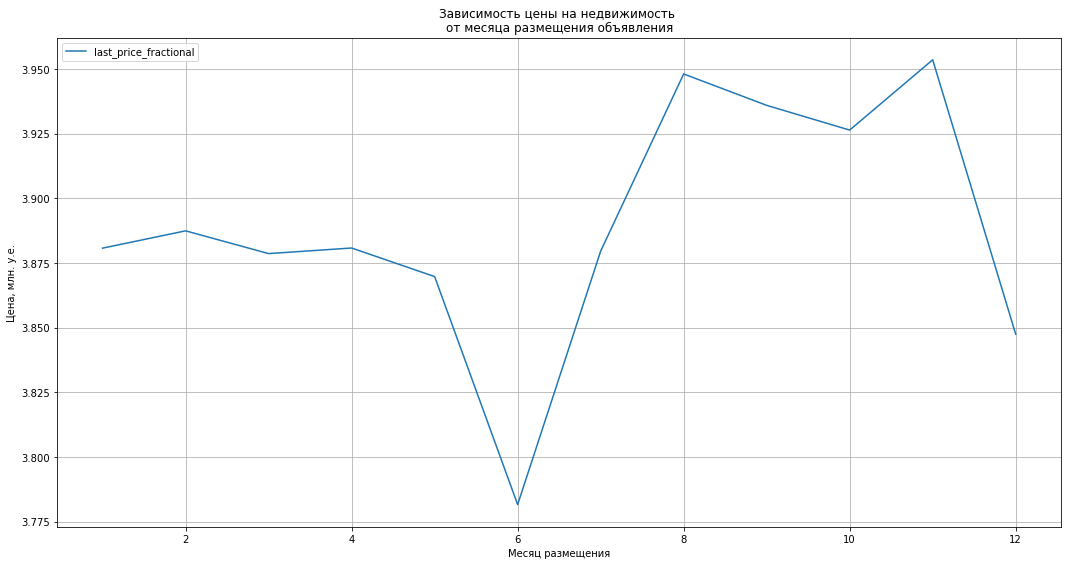

In [24]:
# График зависимости цены от месяца размещения объявления
good_data.plot(x= 'month', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот месяца размещения объявления")
plt.xlabel("Месяц размещения")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'month', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот месяца размещения объявления")
plt.xlabel("Месяц размещения")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['month'].corr(good_data['last_price_fractional'])))

В этом пункте группировка с pivot_table не дает какого-либо конкретного ответа на поставленный вопрос. Зато значение коэффициента корреляции (практически равно 0) говорит само за себя - какой либо зависмости цены на недвижимость от месяца размещения объявления о продаже не существует.

Коэффициент корреляции равен -0.029150188563247265


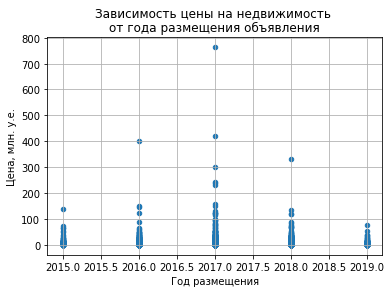

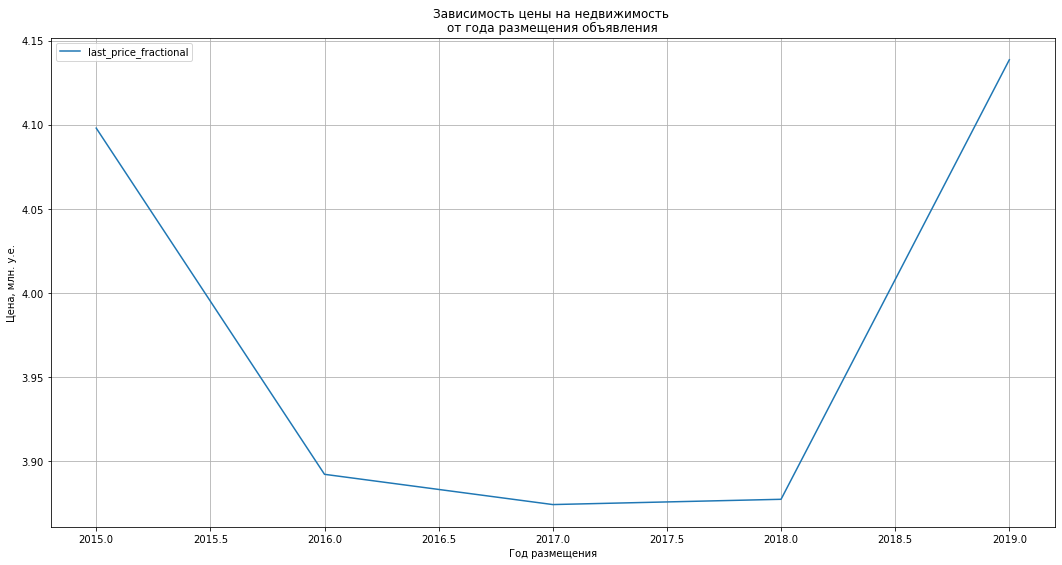

In [25]:
# График зависимости цены от года размещения объявления 
good_data.plot(x= 'year', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот года размещения объявления")
plt.xlabel("Год размещения")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'year', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот года размещения объявления")
plt.xlabel("Год размещения")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['year'].corr(good_data['last_price_fractional'])))

В этом пункте группировка с pivot_table не дает какого-либо конкретного ответа на поставленный вопрос. Зато значение коэффициента корреляции (практически равно 0) говорит само за себя - какой либо зависимости цены на недвижимость от года размещения объявления о продаже не существует.

Коэффициент корреляции -0.02024217239764403


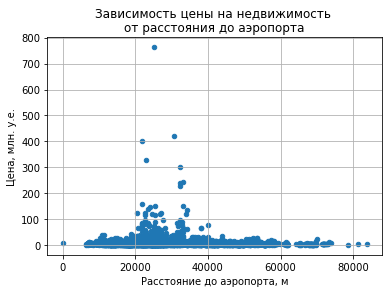

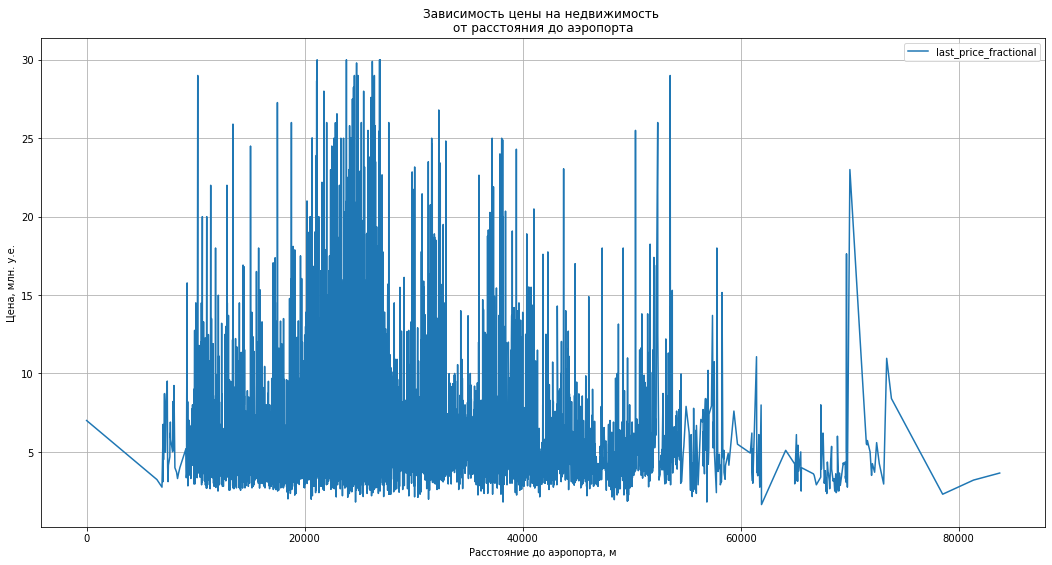

In [26]:
# График зависимости цены от расстояния до аэропорта
good_data.plot(x= 'airports_nearest', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот расстояния до аэропорта")
plt.xlabel("Расстояние до аэропорта, м")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.99)')
    .pivot_table(index= 'airports_nearest', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот расстояния до аэропорта")
plt.xlabel("Расстояние до аэропорта, м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции {}".format(good_data['airports_nearest'].corr(good_data['last_price_fractional'])))

График, построенный с группировкой с pivot_table, дает нам подсказку, что в зависимости от удаленности от аэропорта цена меняется, однако коэффициент корреляции говорит, что зависимости нет. (самолет - не самый популярный вид транспорта). "Всплеск" в районе 20-40 км скорее всего относится к Санкт-Петербургу.

Коэффициент корреляции равен 0.00854115186178668


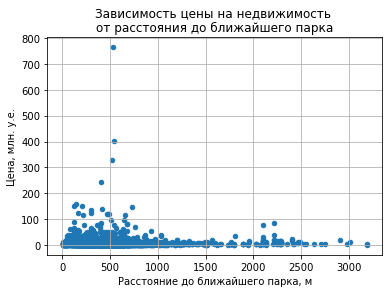

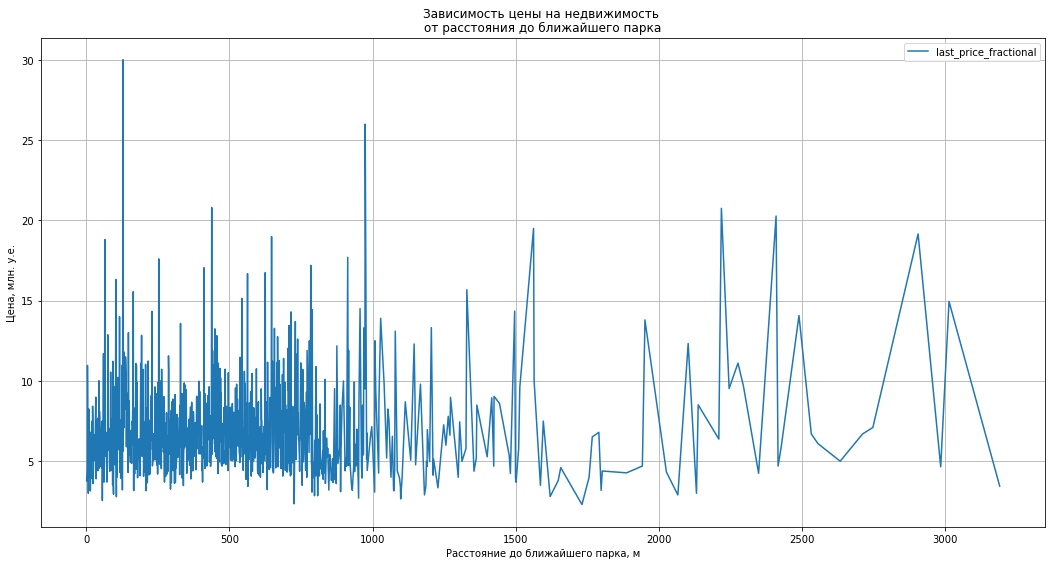

In [27]:
# График зависимости цены от расстояния до ближайшего парка
good_data.plot(x= 'parks_nearest', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот расстояния до ближайшего парка")
plt.xlabel("Расстояние до ближайшего парка, м")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.99)')
    .pivot_table(index= 'parks_nearest', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот расстояния до ближайшего парка")
plt.xlabel("Расстояние до ближайшего парка, м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['parks_nearest'].corr(good_data['last_price_fractional'])))

Значение коэффициента корреляции, а также график построенный с группировкой с pivot_table говорят о том, что зависимость цены жилья от количества парков рядом с квартирой не прослеживается.

Коэффициент корреляции равен -0.0697359396961869


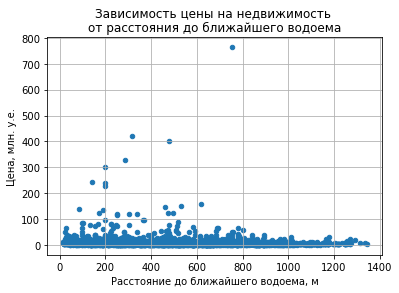

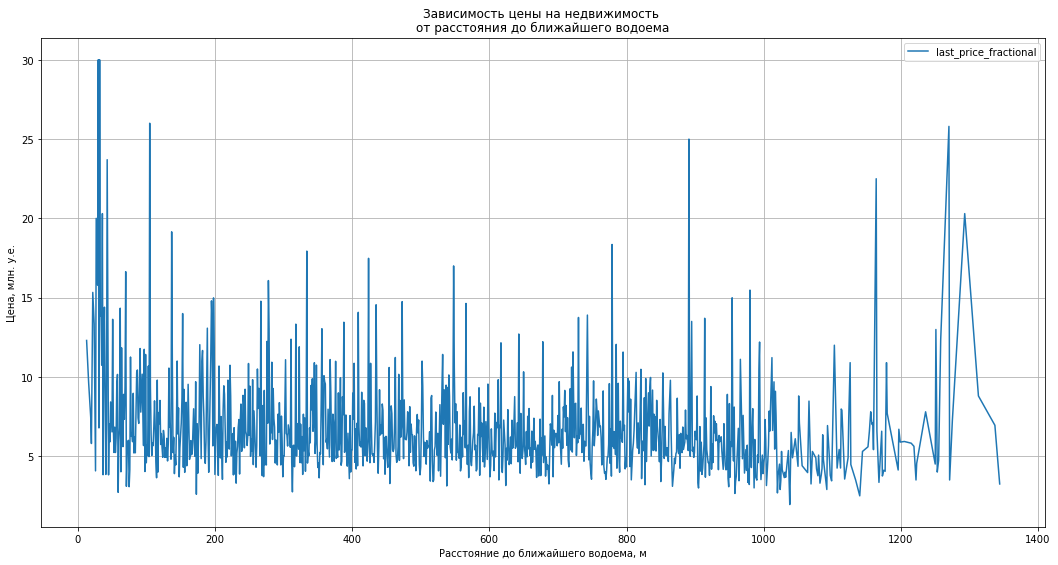

In [28]:
# График зависимости цены от расстояния до ближайшего водоема
good_data.plot(x= 'ponds_nearest', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот расстояния до ближайшего водоема")
plt.xlabel("Расстояние до ближайшего водоема, м")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.99)')
    .pivot_table(index= 'ponds_nearest', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот расстояния до ближайшего водоема")
plt.xlabel("Расстояние до ближайшего водоема, м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['ponds_nearest'].corr(good_data['last_price_fractional'])))

Значение коэффициента корреляции, а также график построенный с группировкой с pivot_table говорят о том, что зависимость цены жилья от количества водоемов рядом с квартирой не прослеживается.

Коэффициент корреляции -0.005705348240782362


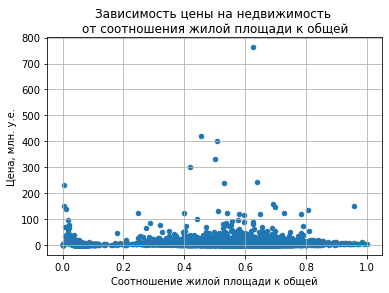

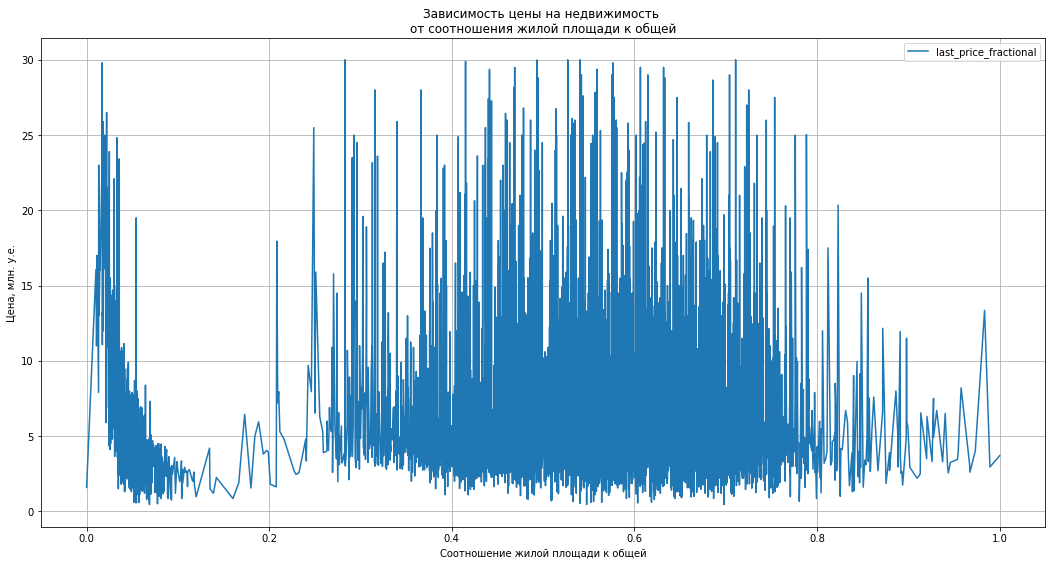

In [29]:
# График зависимости цены от соотношения жилой площади к общей
good_data.plot(x= 'living/total_area', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот соотношения жилой площади к общей")
plt.xlabel("Соотношение жилой площади к общей")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.99)')
    .pivot_table(index= 'living/total_area', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот соотношения жилой площади к общей")
plt.xlabel("Соотношение жилой площади к общей")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции {}".format(good_data['living/total_area'].corr(good_data['last_price_fractional'])))

Значение коэффициента корреляции, а также график построенный с группировкой с pivot_table говорят о том, что зависимость цены жилья от соотношения жилой площади к общей не прослеживается.

Коэффициент корреляции равен -0.1105732887155582


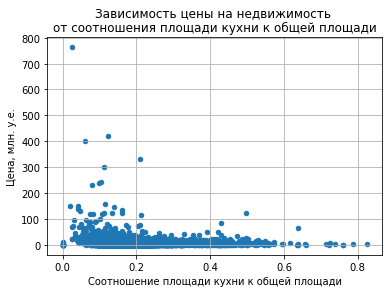

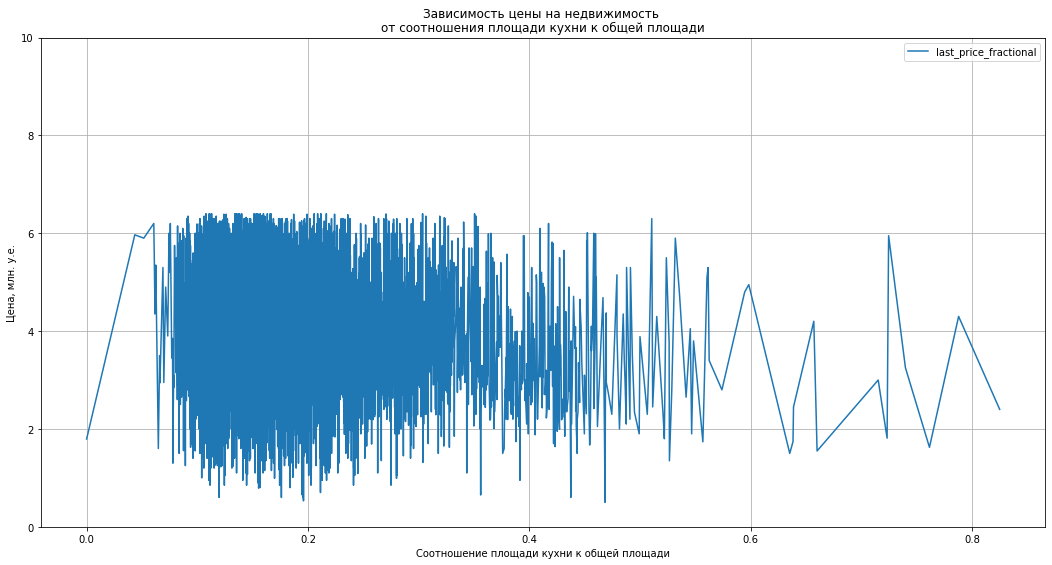

In [30]:
# График зависимости цены от соотношения площади кухни к общей площади
good_data.plot(x= 'kitchen/total_area', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот соотношения площади кухни к общей площади")
plt.xlabel("Соотношение площади кухни к общей площади")
plt.ylabel("Цена, млн. у.е.")
(good_data
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'kitchen/total_area', values= 'last_price_fractional')
    .plot(ylim= (0,10), grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость \nот соотношения площади кухни к общей площади")
plt.xlabel("Соотношение площади кухни к общей площади")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['kitchen/total_area'].corr(good_data['last_price_fractional'])))

Значение коэффициента корреляции, а также график построенный с группировкой с pivot_table говорят о том, что зависимость цены жилья от соотношения кухни к общей площади не прослеживается.

##### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [31]:
# Выводим топ-10 населенных пунктов по количеству объявлений об аренде
price_local = good_data.pivot_table(index= 'locality_name', values= 'last_price', aggfunc = 'count')

local_price_per_m2 = good_data.pivot_table(index= 'locality_name', values= 'price_per_m2')

local_price_full = price_local.join(local_price_per_m2.astype('int'))
display(local_price_full.sort_values(by= 'last_price', ascending = False).head(10))

,last_price,price_per_m2
locality_name,,
Санкт-Петербург,10192,111767
посёлок Мурино,395,86109
посёлок Шушары,333,77992
Всеволожск,272,69158
посёлок Парголово,243,88742
Пушкин,232,101089
Колпино,232,74123
деревня Кудрово,222,93181
Гатчина,210,67339


Сделана выборка с 10 населенными пунктами с наибольшим количеством объявлений. Посчитана средняя стоимость квадратного метра жилья. Самое дорогое жилье в Санкт-Петербурге (неудивительно - всё-таки северная столица), самое дешевое жилье в этом списке - в Выборге - 56608 у.е. за кв.м. (до областного центра 3 дня на перекладных добираться :)))

##### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Text(0, 0.5, 'Цена, млн. у.е.')

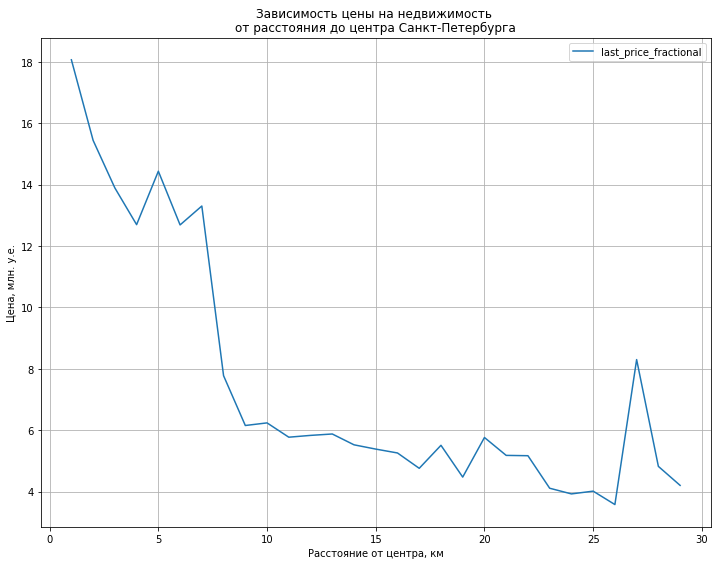

In [32]:
# Выделим необходимый срез датасета и построим график
spb_estate = good_data.query('locality_name == "Санкт-Петербург"')
spb_estate['center_km'] = spb_estate['cityCenters_nearest']/1000
spb_estate['center_km'] = spb_estate['center_km'].fillna(0).astype('int')

spb_estate_pivot = spb_estate.pivot_table(index= 'locality_name', values= 'last_price_fractional', aggfunc= 'mean')
mean_price = 8         
spb_estate['mean_price_per_km'] = spb_estate['center_km']/mean_price

(spb_estate
     .query('center_km > 0')
     .pivot_table(index= 'center_km', values='last_price_fractional')
     .plot(grid = True, figsize = (12, 9))
);
plt.title("Зависимость цены на недвижимость \nот расстояния до центра Санкт-Петербурга")
plt.xlabel("Расстояние от центра, км")
plt.ylabel("Цена, млн. у.е.")

В данном задании выделены объявления только из Санкт-Петербурга. Посчитаны и добавлены в таблицу значения расстояния до центра города в километрах. Посчитана средняя цена за каждый километр от центра. Построен график зависимости цены недвижимости от удаленности от центра города. По достижении значения удалённости 10 км, падение цены приостанавливается - далее цена за недвижимость находится в пределах 4 - 6 млн. у.е. То есть центральная зона - зона в радиусе 10 километров от центра города.

##### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Коэффициент корреляции равен 0.6453972978354318


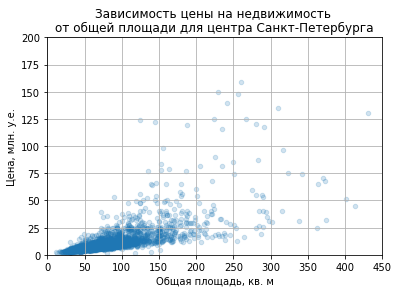

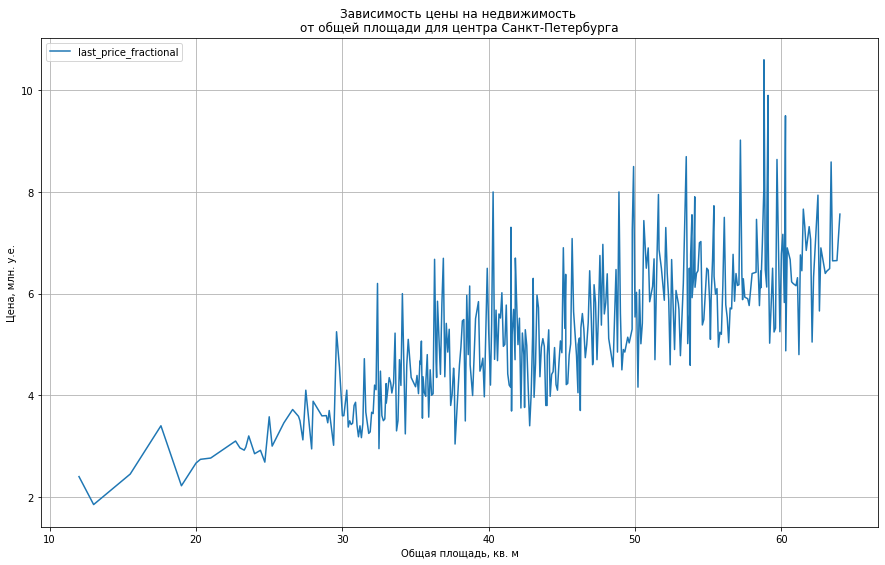

In [33]:
# Создаем необходимый срез данных
spb_query = spb_estate.query('center_km <= 10')
# Строим график зависимости цены от общей площади
spb_query.plot(x= 'total_area', y= 'last_price_fractional', kind= 'scatter', grid = True, ylim= (0, 200), xlim= (0,450), alpha= 0.2)
plt.title("Зависимость цены на недвижимость \nот общей площади для центра Санкт-Петербурга")
plt.xlabel("Общая площадь, кв. м")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('total_area <= total_area.quantile(q = 0.5) and last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'total_area', values= 'last_price_fractional')
    .plot(grid = True, figsize = (15, 9))
);
plt.title("Зависимость цены на недвижимость \nот общей площади для центра Санкт-Петербурга")
plt.xlabel("Общая площадь, кв. м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(spb_query['total_area'].corr(spb_query['last_price_fractional'])))

Изучена зависмость цены на недвижимость от общей площади недвижимости для центра Санкт-Петербурга. Построен график зависимости методом группировки с pivot_table для большей наглядности. Посчитан коэффициент корреляции. K = 0.63. Он положителен, значит чем больше площадь продаваемого жилья, тем выше его стоимость.

Коэффициент корреляции равен 0.3550402349467343


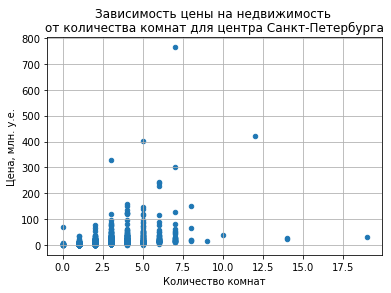

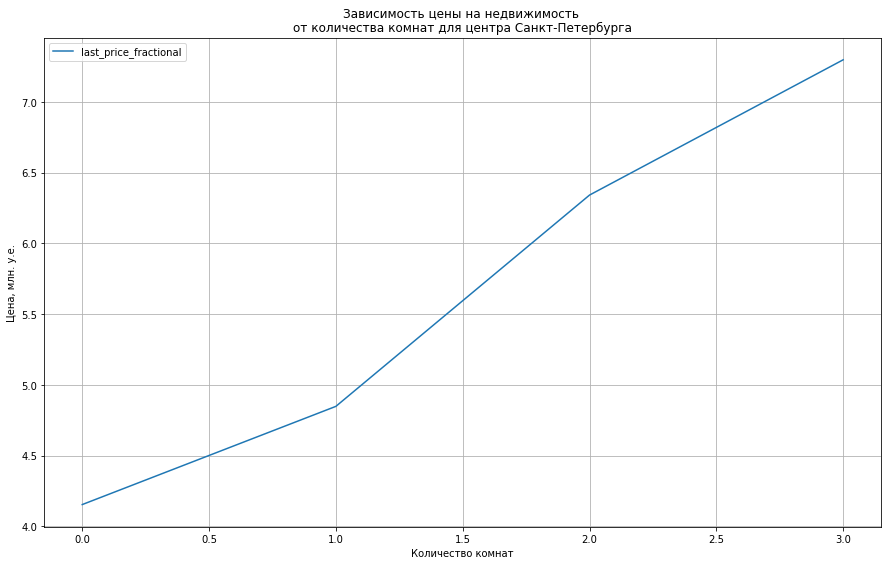

In [34]:
# График зависимости цены от количества комнат
spb_query.plot(x= 'rooms', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость \nот количества комнат для центра Санкт-Петербурга")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('rooms <= rooms.quantile(q = 0.75) and last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'rooms', values= 'last_price_fractional')
    .plot(grid = True, figsize = (15, 9))
);
plt.title("Зависимость цены на недвижимость \nот количества комнат для центра Санкт-Петербурга")
plt.xlabel("Количество комнат")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(spb_query['rooms'].corr(spb_query['last_price_fractional'])))

Изучена зависмость цены на недвижимость от количества комнат в центре Санкт-Петербурга. Построен график зависимости методом группировки с pivot_table для большей наглядности. Получена информативная кривая, по виду которой можно сказать, что с увеличением числа комнат, растет цена квартиры. Посчитанный коффициент корреляции не дает объективной информации из-за большого выброса в виде цены в 800 млн. у.е. и квартир, в которых более 8 комнат.

Коэффициент корреляции равен -0.16214882107660497


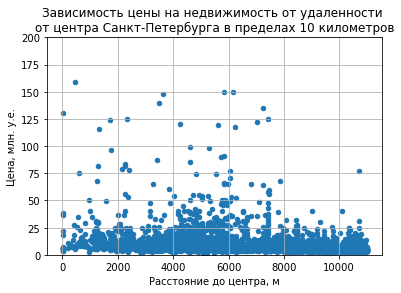

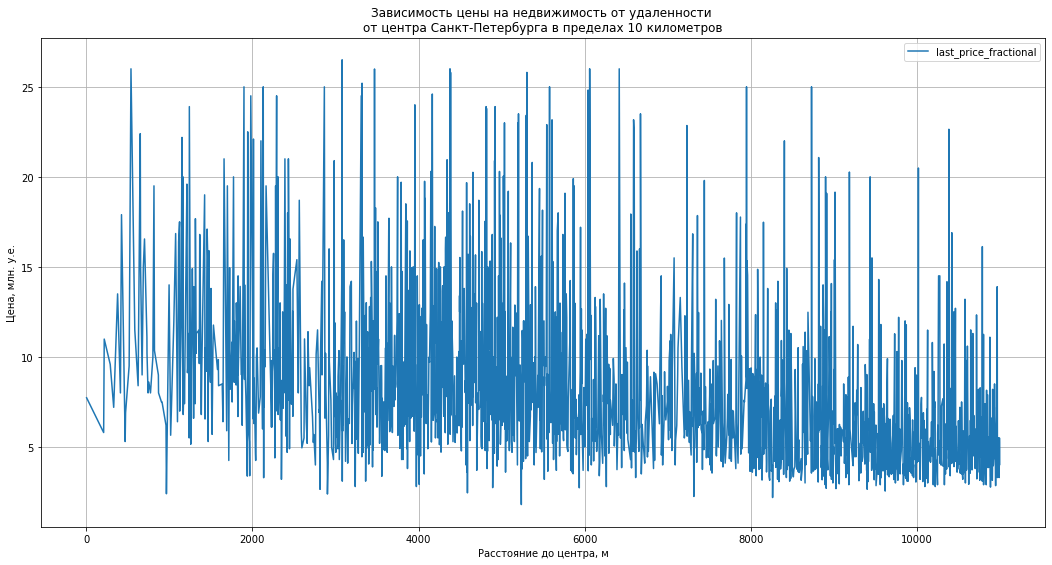

In [35]:
# График зависимости цены от расстояния до центра
spb_query.plot(x= 'cityCenters_nearest', y= 'last_price_fractional', kind= 'scatter', grid = True, ylim= (0, 200))
plt.title("Зависимость цены на недвижимость от удаленности \nот центра Санкт-Петербурга в пределах 10 километров")
plt.xlabel("Расстояние до центра, м")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.95)')
    .pivot_table(index= 'cityCenters_nearest', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость от удаленности \nот центра Санкт-Петербурга в пределах 10 километров")
plt.xlabel("Расстояние до центра, м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(spb_query['cityCenters_nearest'].corr(spb_query['last_price_fractional'])))

Изучена зависмость цены на недвижимость от удалености от центра Санкт_петербурга. Построен график зависимости методом группировки с pivot_table для большей наглядности. Можно сделать вывод, что цена на жилье в центре города находится в пределах 60 млн. у.е. за исключением некоторых "выбросов" до 160 млн. у.е. (возможно это квартиры с видом на Зимний дворец, или в них более 4-х комнат).

,last_price_fractional
first/last_floor,
first,5.415
last,7.350
other,7.450


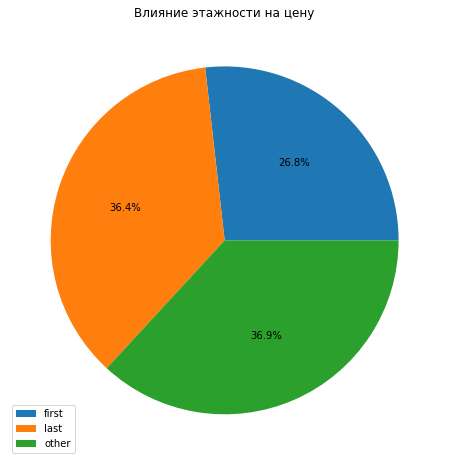

In [36]:
# График зависимости цены от "этажности"
floor_data_pie_spb = spb_query.pivot_table(index = 'first/last_floor', values = 'last_price_fractional', aggfunc = 'median')
display(floor_data_pie_spb)
floor_data_pie_spb.columns = ['median_price']
labels = 'Первый этаж', 'Последний этаж', 'Другие этажи'
floor_data_pie_spb.plot(y= 'median_price', kind = 'pie', labels=None, autopct = '%1.1f%%', figsize = (8,8))
plt.title('Влияние этажности на цену') 
plt.ylabel('')
plt.show()

Что касается "этажности" жилья, то здесь тенденции схожи, с жильем за пределами "центральной" зоны и остальных населенных пунктов. На первом этаже квартиры значительно дешевле. На последних этажах квартиры немного дешевле, чем на остальных.

Коэффициент корреляции равен 0.015190105971139711


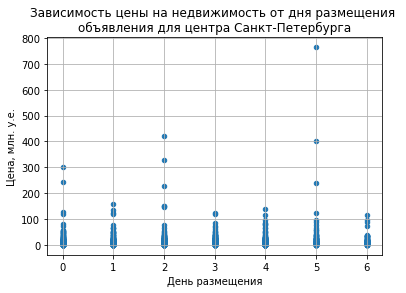

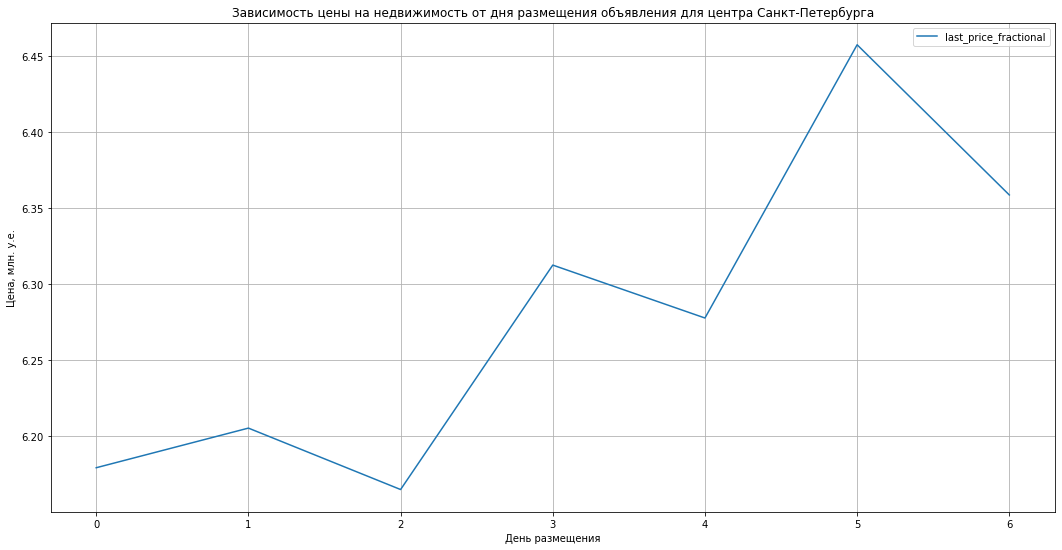

In [37]:
# График зависимости цены от дня размещения объявления
spb_query.plot(x= 'weekday', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость от дня размещения \nобъявления для центра Санкт-Петербурга")
plt.xlabel("День размещения")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'weekday', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость от дня размещения объявления для центра Санкт-Петербурга")
plt.xlabel("День размещения")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(spb_query['weekday'].corr(spb_query['last_price_fractional'])))

В этом пункте группировка с pivot_table не дает какого-либо конкретного ответа на поставленный вопрос. Зато значение коэффициента корреляции (практически равно 0) говорит само за себя - какой либо зависмости цены на недвижимость в центре Санкт-Петербурга от дня недели размещения объявления о продаже не существует.

Коэффициент корреляции равен 0.011608863952330076


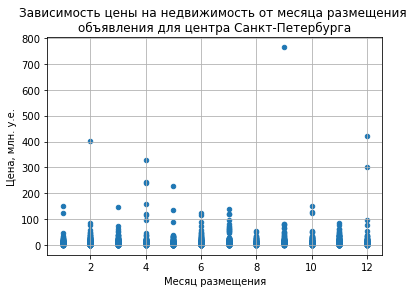

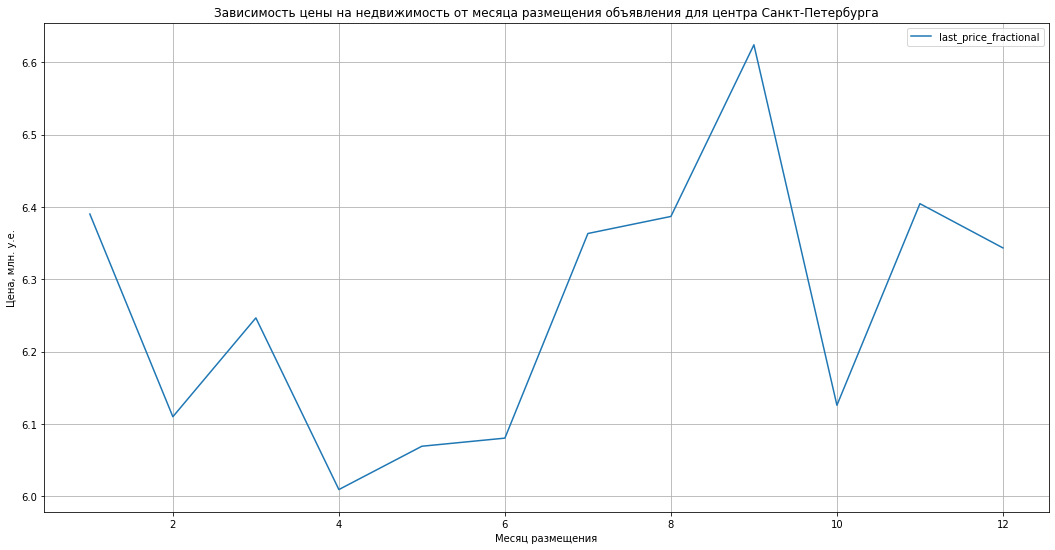

In [38]:
# График зависимости цены от месяца размещения объявления
spb_query.plot(x= 'month', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость от месяца размещения \nобъявления для центра Санкт-Петербурга")
plt.xlabel("Месяц размещения")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'month', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость от месяца размещения объявления для центра Санкт-Петербурга")
plt.xlabel("Месяц размещения")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(spb_query['month'].corr(spb_query['last_price_fractional'])))

В этом пункте группировка с pivot_table не дает какого-либо конкретного ответа на поставленный вопрос. Зато значение коэффициента корреляции (практически равно 0) говорит само за себя - какой либо зависмости цены на недвижимость от месяца размещения объявления о продаже не существует.

Коэффициент корреляции равен -0.029150188563247265


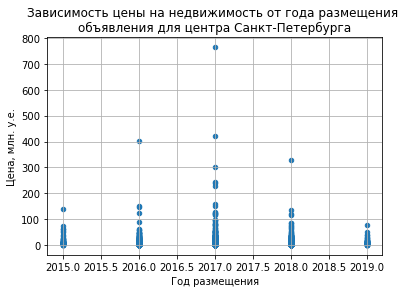

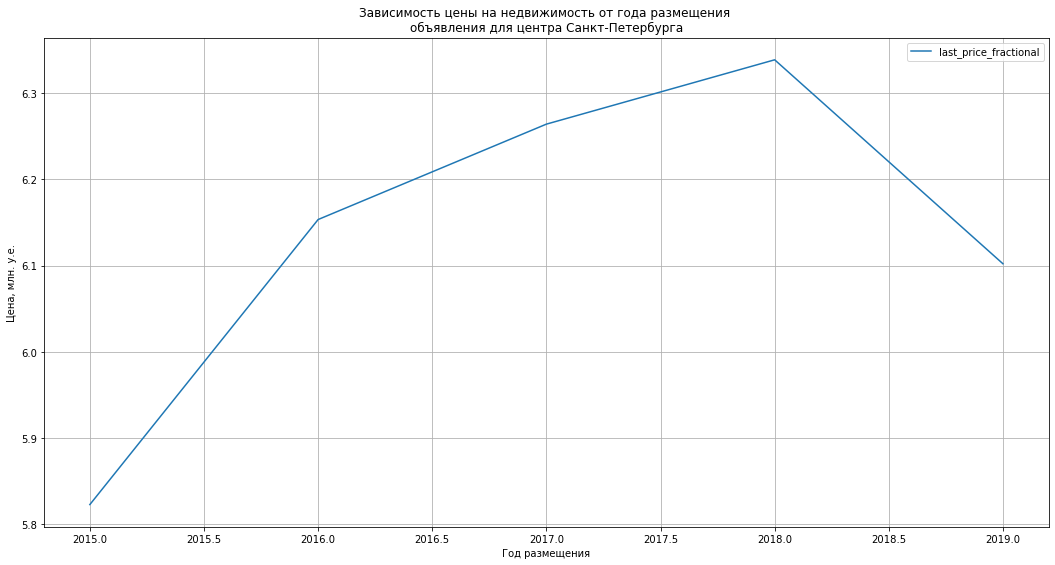

In [39]:
# График зависимости цены от года размещения объявления
spb_query.plot(x= 'year', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость от года размещения \nобъявления для центра Санкт-Петербурга")
plt.xlabel("Год размещения")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.75)')
    .pivot_table(index= 'year', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость от года размещения \nобъявления для центра Санкт-Петербурга")
plt.xlabel("Год размещения")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['year'].corr(good_data['last_price_fractional'])))

А вот в данном пункте график подсказывает, что цена недвижимости растет до 2018 года, а после снижается. Но посмотрев на значение коэффициента корреляции, все таки делаем вывод, что значение цены на недвижимость не зависит от года размещения объявления 


Коэффициент корреляции равен -0.029150188563247265


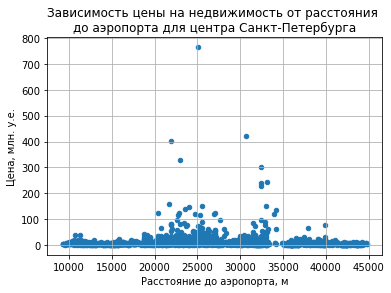

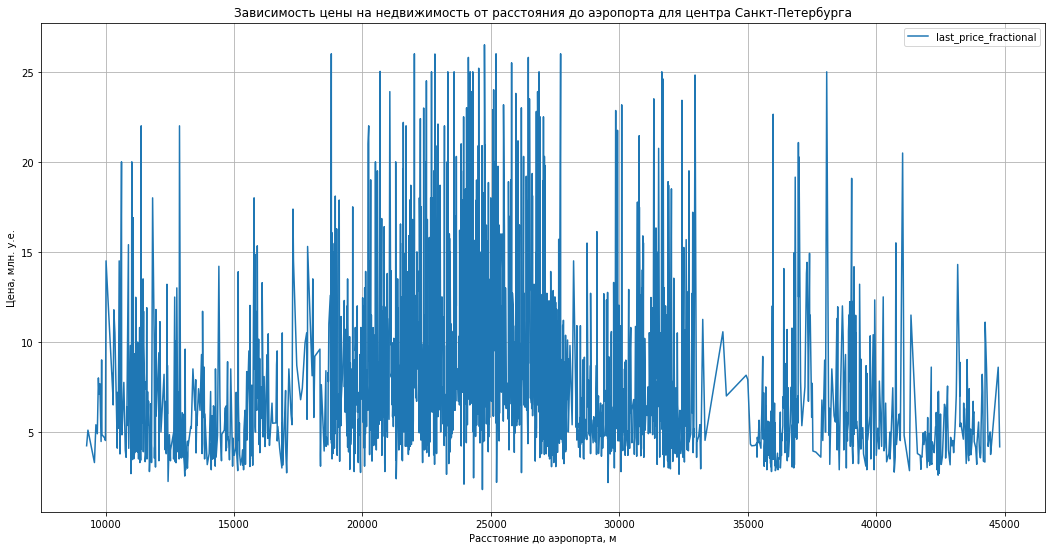

In [40]:
# График зависимости цены от расстояния до аэропорта
spb_query.plot(x= 'airports_nearest', y= 'last_price_fractional', kind= 'scatter', grid = True)
plt.title("Зависимость цены на недвижимость от расстояния \nдо аэропорта для центра Санкт-Петербурга")
plt.xlabel("Расстояние до аэропорта, м")
plt.ylabel("Цена, млн. у.е.")
(spb_query
    .query('last_price_fractional <= last_price_fractional.quantile(q = 0.95)')
    .pivot_table(index= 'airports_nearest', values= 'last_price_fractional')
    .plot(grid = True, figsize = (18, 9))
);
plt.title("Зависимость цены на недвижимость от расстояния до аэропорта для центра Санкт-Петербурга")
plt.xlabel("Расстояние до аэропорта, м")
plt.ylabel("Цена, млн. у.е.")
print("Коэффициент корреляции равен {}".format(good_data['year'].corr(good_data['last_price_fractional'])))

Коэффициент корреляции и вид графика говорят о том, что близость аэропорта не влияет на стоимость жилья.

Исследование зависимости цены жилья в центре Санкт-Петербурга от близости парков, близости водоемов, соотношения жилой площади к общей, соотношения площади кухни к общей площади не проводилось, поскольку какой-нибудь внятной зависимости для общих данных по Ленинградской области не было обнаружено.

Для центра Санкт-Петербурга выводы похожи на выводы для остальных населенных пунктов. Зависимости цен от различных факторов идентичны. Отличается только цена жилья в зависимости от населенного пункта.

### Шаг 5. Общий вывод

Проведено исследование объявлений о продаже квартир в Ленинградской области. Получены данные о зависимости цены квартиры от различных факторов. Самыми выгодными для продажи оказываются 1-, 2-х, 3-хкомнатные квартиры не на первом этаже, поближе к центру населенного пункта, с общей площадью более 75 кв.м. Близость аэропорта, парков, водоемов на стоимость квартиры не влияет, как и соотношение жилой к общей площади и соотношение площади кухни к общей площади.